In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

#### Loading Data

In [2]:
data = pd.read_csv('Car_dataset.csv')

In [3]:
data[:5]

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

#### Exploring the descriptive statistics of the varaible

In [4]:
data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [5]:
# for including all variables
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


#### Observations

1. The count of values for each columns is different -> there are some missing data

2. There are 312 unique models of cars available in the dataset

3. There are no missing values in columns "Brand", "Body", "Mileage", "Engine Type", "Registration" and "Year"

4. There are some missing values in columns "Price" and  "EngineV".

#### 5 most frequent values for columns

In [6]:
# for columnName in data.columns:
#     # print(data[columnName].value_counts().nlargest(5))

Name: Brand, dtype: int64

Volkswagen       936

Mercedes-Benz    921

BMW              694

Toyota           541

Renault          469

#############################################################################################

Name: Price, dtype: int64

6500.0     41

8500.0     37

10500.0    36

9500.0     35

11500.0    35

#############################################################################################

Name: Body, dtype: int64

sedan        1649

crossover     901

van           675

other         433

vagon         402


#############################################################################################

Name: Mileage, dtype: int64

0      185

1      127

200     89

250     78

300     75

############################################################################################# 

Name: EngineV, dtype: int64

2.0    709

3.0    549

2.5    350

1.6    318

2.2    294

#############################################################################################

Name: Engine Type, dtype: int64

Diesel    2019

Petrol    1559

Gas        613

Other      154

#############################################################################################

Name: Registration, dtype: int64

yes    3947

no      398

#############################################################################################

Name: Year, dtype: int64

2008    419

2007    357

2012    355

2011    319

2013    266

#############################################################################################

Name: Model, dtype: int64

E-Class    199

A6         172

Vito       171

Kangoo     146

Camry      134


In [7]:
data.dtypes

Brand            object
Price           float64
Body             object
Mileage           int64
EngineV         float64
Engine Type      object
Registration     object
Year              int64
Model            object
dtype: object

# Unique values in each column

In [8]:
def columnsUnique(dataframe):
    for columnName in dataframe.columns:
        if dataframe.dtypes[columnName] == 'object':
            print('######################################################')
            if len(dataframe[columnName].unique()) > 20:
                print(columnName +' contains unique values ',end=":")
                print(len(dataframe[columnName].unique()))
            else:
                print(columnName +' contains unique values ',end=":")
                print(len(dataframe[columnName].unique()))
                print("values are:",dataframe[columnName].unique())

In [9]:
columnsUnique(data)

######################################################
Brand contains unique values :7
values are: ['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi']
######################################################
Body contains unique values :6
values are: ['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']
######################################################
Engine Type contains unique values :4
values are: ['Petrol' 'Diesel' 'Gas' 'Other']
######################################################
Registration contains unique values :2
values are: ['yes' 'no']
######################################################
Model contains unique values :312


#### determinig the variables of interest

In [10]:
#  axis 0 -> rows, axis 1 -> columns
modified_data = data.drop(['Model'], axis=1) 
modified_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


#### Handling Missing Values

Rule of thumb -> if you are removing <5% of the observations, then we can remove the rows from the dataframe

In [11]:
modified_data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [12]:
print(172/4345)

0.03958573072497123


The percentage of null values is less than 5% so we can remove the rows from data

In [13]:
no_mv_data = modified_data.dropna(axis=0)

#### descriptive probability identifier for the no_mv_data(no missing value data)

In [14]:
no_mv_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [15]:
# checking for the null values again
no_mv_data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

### Exploring PDFs

Plot for the features before removal of outliers


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

<Figure size 640x480 with 0 Axes>

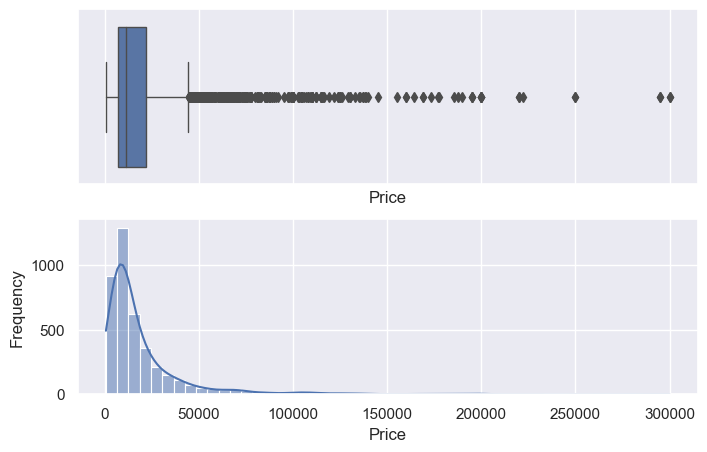

<Figure size 800x500 with 0 Axes>

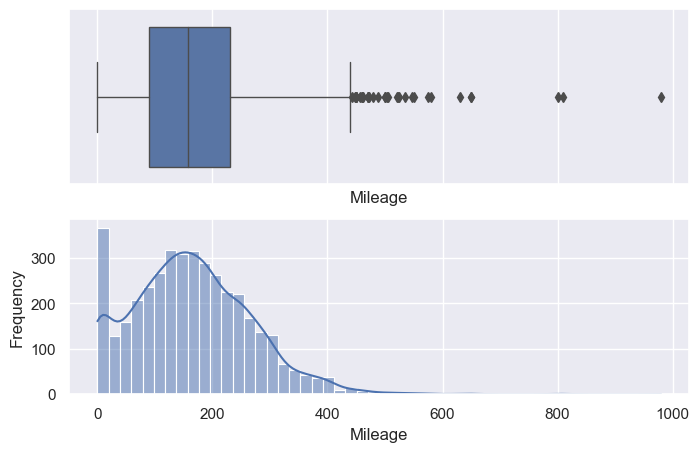

<Figure size 800x500 with 0 Axes>

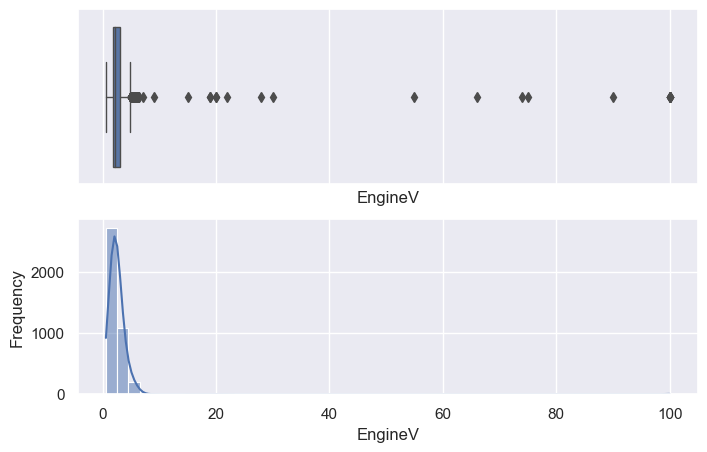

<Figure size 800x500 with 0 Axes>

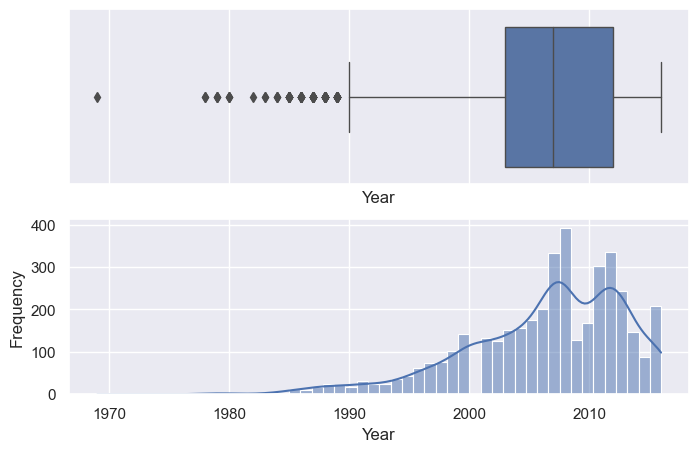

In [16]:
print('Plot for the features before removal of outliers')
for column in ['Price', 'Mileage','EngineV', 'Year']:
   plt.figure()
   plt.tight_layout()
   sns.set(rc={"figure.figsize": (8, 5)})
   f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
   plt.gca().set(xlabel=column, ylabel='Frequency')
   sns.boxplot(no_mv_data[column], ax=ax_box , linewidth= 1.0)
   sns.histplot(no_mv_data[column], ax=ax_hist,bins=50 ,kde=True)

Removing outliers in the exponential distribution -> in exponential distribution outlier lies at the tail end of the distribution.

Remove top 1% of observations.

## Dealing with outliers

In statistics, we have three measures of central tendency namely <b>Mean</b>,<b> Median</b>, and <b>Mode</b>. They help us describe the data.

<b>Mean</b> is the accurate measure to describe the data when we do not have any outliers present.

<b>Median</b> is used if there is an outlier in the dataset.

<b>Mode</b> is used if there is an outlier AND about ½ or more of the data is the same.

‘Mean’ is the only measure of central tendency that is affected by the outliers which in turn impacts Standard deviation.

We are using the quantile method for dealing with the outliers

Quantile based flooring and capping

In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.


In [17]:
# removing outliers for feature "Price"
q = no_mv_data['Price'].quantile(0.99)
data_1 = no_mv_data[no_mv_data['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


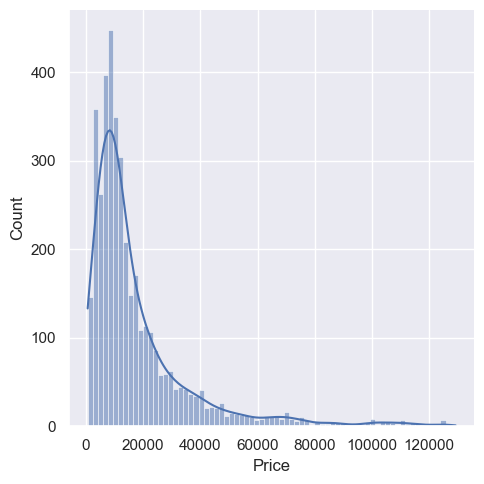

In [18]:
sns.displot(data_1['Price'], kde=True, rug=False)

In [19]:
# removing outliers for feature "Mileage"
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


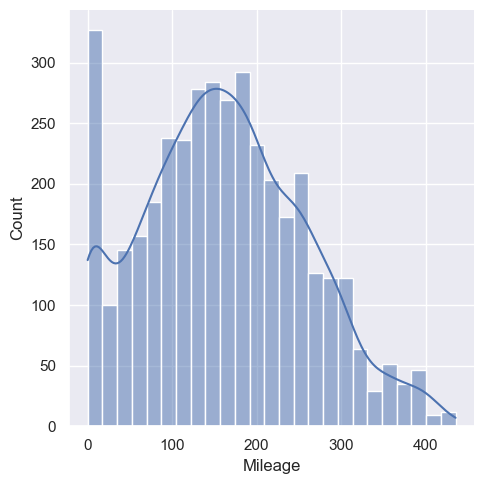

In [20]:
sns.displot(data_2['Mileage'], kde=True, rug=False)

#### Outliers for feature "EngineV" Engine Volume

By analying the standards for the engine volume in the market, we can conclude that the range (0.6 - 6.5 ) in which the volume should normally lies.

There are many values in the feature vector where it is 99.99, 90 etc -> this are incorrect entries 

common way to label missing value is by assigning 99.99

In [21]:
data_3 = data_2[data_2['EngineV'] < 6.5]

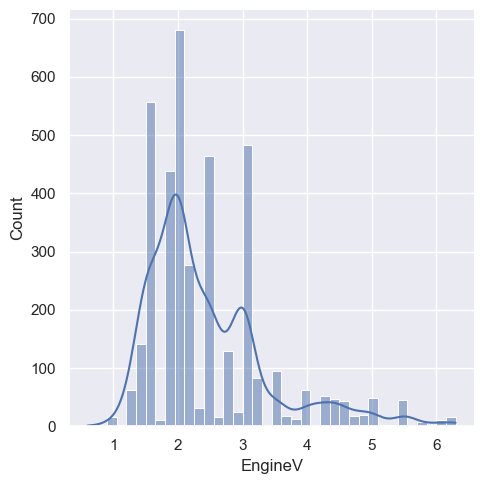

In [22]:
sns.displot(data_3['EngineV'], kde=True )

### <b>Outlier Handling for the feature 'Year'</b>

there are some cars which is quite old and can be considered as vinatge car and vinatge car prioce can't be extimated using the same criteria for the second habd cars which belong to the recent years.

In [23]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

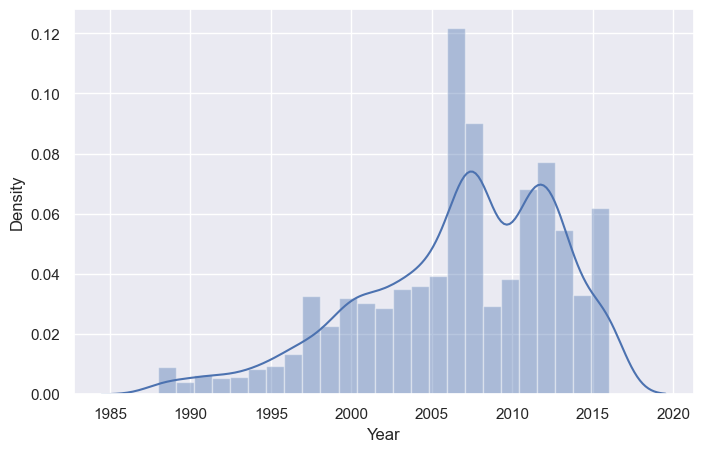

In [24]:
sns.distplot(data_4['Year'])

Plot for the features after removal of outliers


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/si

<Figure size 800x500 with 0 Axes>

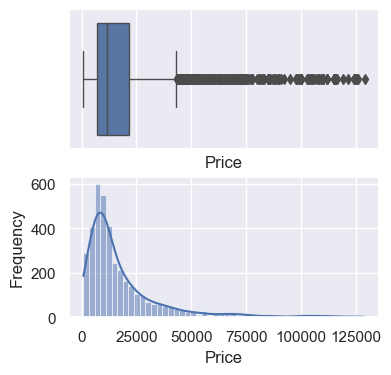

<Figure size 400x400 with 0 Axes>

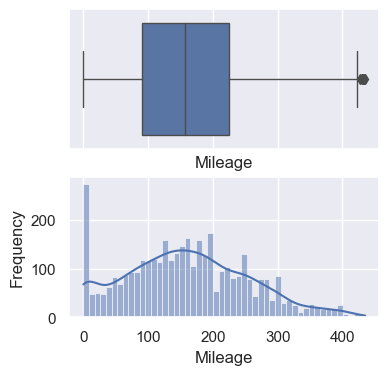

<Figure size 400x400 with 0 Axes>

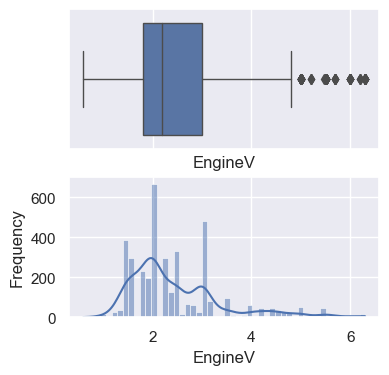

<Figure size 400x400 with 0 Axes>

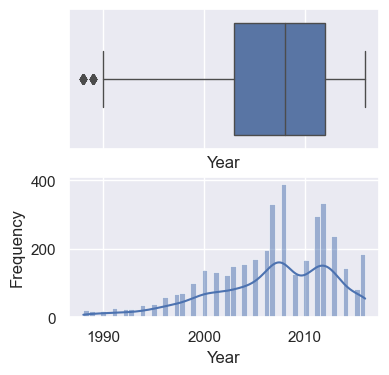

In [25]:
print('Plot for the features after removal of outliers')
for column in ['Price', 'Mileage','EngineV', 'Year']:
   plt.figure()
   plt.tight_layout()
   sns.set(rc={"figure.figsize": (4, 4)})
   f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
   plt.gca().set(xlabel=column, ylabel='Frequency')
   sns.boxplot(data_4[column], ax=ax_box , linewidth= 1.0)
   sns.histplot(data_4[column], ax=ax_hist,bins=50 ,kde=True)

In [26]:
# re indexing the data
data_cleaned = data_4.reset_index(drop=True)

In [27]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions


Text(0.5, 1.0, 'Price and Mileage')

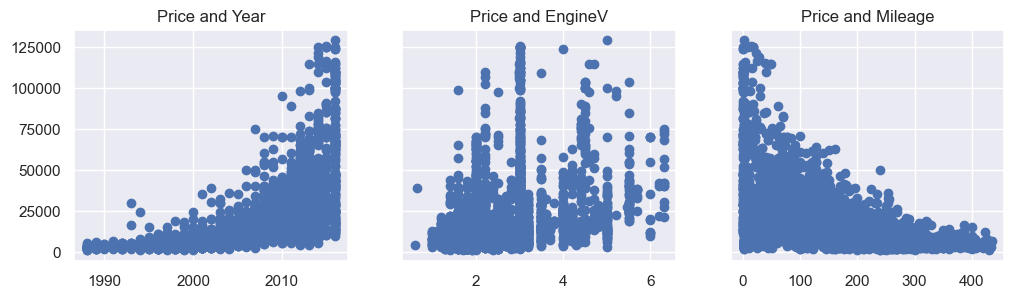

In [28]:
# checking fro linearilty using scatter plot

f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(12,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Price and Mileage')

from the above plots we can infer that the relationship between the features and price in not linear 
therefore we have to transform some of the features

we can also observe that there is a exponential trend between price and features -> we can start with taking log of the price

In [29]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log_price'] = log_price

visulaizing the features with log price

Text(0.5, 1.0, 'Log-Price and Mileage')

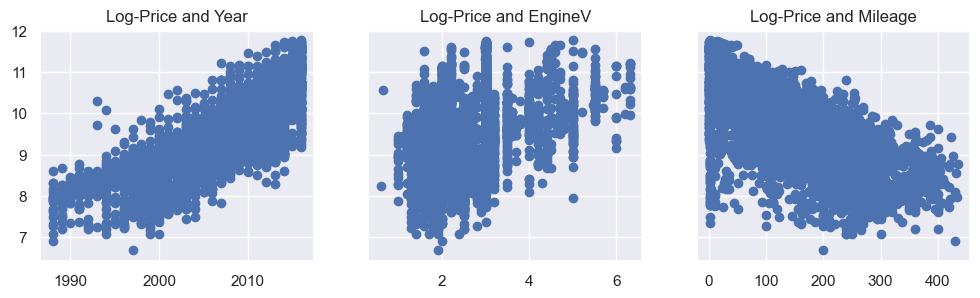

In [30]:
f, (ax1,ax2,ax3) = plt.subplots(1,3, sharey=True, figsize=(12,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Log_price'])
ax1.set_title('Log-Price and Year')
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Log_price'])
ax2.set_title('Log-Price and EngineV')
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Log_price'])
ax3.set_title('Log-Price and Mileage')

we can observe that there some linear relationship between features and the log(price)

In [31]:
# dropping the "Price" column from the dataframe
data_cleaned = data_cleaned.drop(['Price'], axis=1)

### Multicollinearity

In [32]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log_price'], dtype=object)

checking for the multicollinearity -> VIF (variance inflation factor)

Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated, we might have difficulty in distinguishing between their individual effects on the dependent variable. Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

In VIF method, we pick each feature and regress it against all of the other features

vif 

In [33]:
from  statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
# only for the continuous variables
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns

In [34]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


vif = 1 :  no multicollinearity

1 < vif < 5: perfectly okay

5/10 < vif: unacceptable


In [35]:
# removing year for removing multicollinearity from the dataset
data_no_multicollinearity = data_cleaned.drop(['Year'], axis=1)

## Categorical Data

#### creating dummy variables

In [36]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [37]:
data_with_dummies.head()

,Mileage,EngineV,Log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [38]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [39]:
cols = ['Log_price','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [40]:
data_preprocess = data_with_dummies[cols]

In [41]:
data_preprocess.head()

,Log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Linear Regression Model

#### declare the imputs and the targets

In [42]:
targets =  data_preprocess['Log_price']
inputs = data_preprocess.drop(['Log_price'], axis=1)

#### Scale the data

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [44]:
scaler.fit(inputs)

StandardScaler()

In [45]:
inputs_scaled = scaler.transform(inputs)

#### Splitting data into train and test set

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

#### Create The Regression Model

In [47]:
reg = LinearRegression()

In [48]:
reg.fit(x_train, y_train)

LinearRegression()

In [49]:
y_hat = reg.predict(x_train)

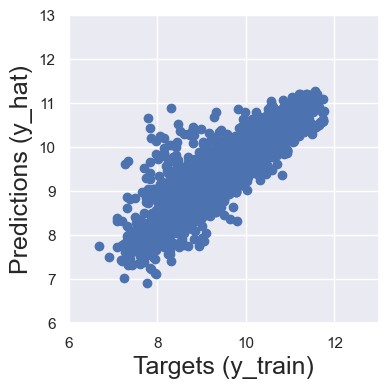

In [50]:
plt.scatter(y_train, y_hat)
plt.xlabel("Targets (y_train)", size=18)
plt.ylabel("Predictions (y_hat)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

<img src ="scatter.png"/>

The more data close to the line, better is the Rgression model

#### Residuals Plots

Text(0.5, 1.0, 'Residuals PDF')

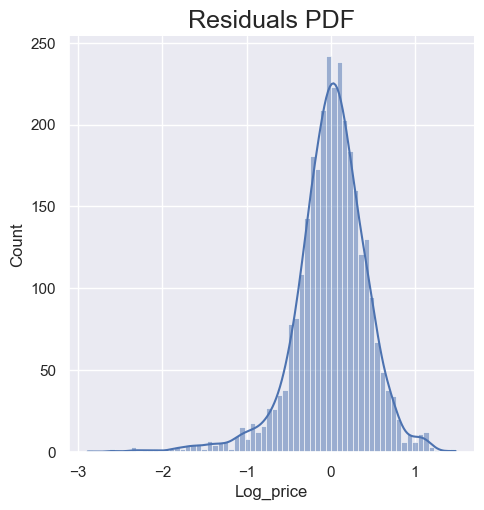

In [51]:
sns.displot(y_train-y_hat ,kde=True)
plt.title("Residuals PDF", size=18)

Error must be normally distributed with mean of 0

In [52]:
reg.score(x_train, y_train)

0.744996578792662

In [53]:
# creating summary table 
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [54]:
print(data_cleaned['Brand'].unique())
print(data_cleaned['Body'].unique())
print(data_cleaned['Engine Type'].unique())
print(data_cleaned['Registration'].unique())

['BMW' 'Mercedes-Benz' 'Audi' 'Toyota' 'Renault' 'Volkswagen' 'Mitsubishi']
['sedan' 'van' 'crossover' 'vagon' 'other' 'hatch']
['Petrol' 'Diesel' 'Gas' 'Other']
['yes' 'no']


Audi is benchmark for the Brand

crossover is benchmark for the Body

Diesel is the benchmark for the Engine Type

Registration - No is the benchmark for the Registration

for continuous variable

1. Positive weight shows that as a feature increases in value, so do the log_price and Price respectively

2. Negative weight shows that as a feature increases in value, log_price and price decreases

for Dummy variable

1. Positive weight shows that the respective category(Brand) is more expensive than the benchmark (Audi)

#### Testing

In [55]:
y_hat_test = reg.predict(x_test)

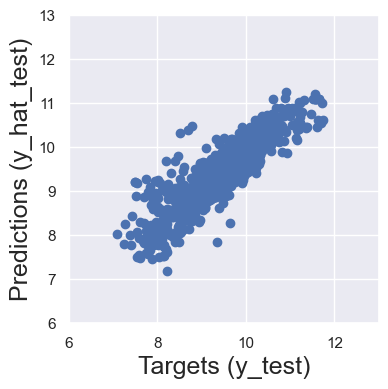

In [56]:
plt.scatter(y_test, y_hat_test)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Predictions (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

<img src ="scatter2.png"/>

The graph is dense at the 45 degree line for higher prices but is saturated for the lower prices

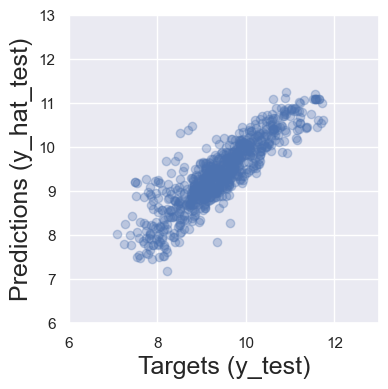

In [57]:
plt.scatter(y_test, y_hat_test, alpha=0.3)
plt.xlabel("Targets (y_test)", size=18)
plt.ylabel("Predictions (y_hat_test)", size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

more staurated the color, the higher the concentration of points
plaer the color, the lower the concentration of points


<img src ="scatter3.png"/>

In [58]:
#  creating a new dataframe for the performance

df_pf = pd.DataFrame(y_hat_test, columns=['Predictions'])
df_pf

,Predictions
0,9.276643
1,8.160305
2,8.929738
3,8.917842
4,9.337280
...,...
769,10.297276
770,9.280992
771,9.541258
772,10.221496


In [59]:
#  reversing the log of price to the actual prices

df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075
...,...
769,29651.726363
770,10732.071179
771,13922.446953
772,27487.751303


In [60]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [61]:
y_test

1192     7.740664
3360     7.937375
2350     7.824046
3257     8.764053
892      9.121509
          ...    
1935    10.292146
3757     9.169518
3134     9.814656
1369    11.134589
2595     9.287301
Name: Log_price, Length: 774, dtype: float64

pandas tried to match the indexes of the both the dataframe and the y_test

Let's try to understand what each of the variables stores.

The variable targets stores the target values, with each of these values corresponding to a unique index. In the targets variable, the indices are arranged in an ascending order.

The train_test_split method reserves some of the observations for training and some - for testing. It does that by shuffling the samples, but preserving their original indices.

Now, y_hat_test is an array of numbers representing the predictions from x_test. Most importantly, y_hat_test doesn't know anything about the indexing of x_test. Therefore, once we add np.exp(y_hat_test) as a column of a DataFrame, the indexing naturally starts from 0 and goes down to 773 in an ascending fashion.

Now, imagine what happens when we add np.exp(y_test) as a second column to the same DataFrame object. pandas will try to match the indices of y_hat_test (ranging from 0 to 773) to those of y_test (randomly drawn from the targets variable). However, y_test contains indices that are larger than 773. Additionally, some indices between 0 and 773 will not be included. Let's show that this is indeed the case.

In the code below, right after the definition of the df_pf DataFrame, I have created another one called data_test that stores only the (exponential of the) values of y_test together with their original indices.
image.png

From the output of the df_pf DataFrame, we can see that index 1 gives a non-null value in the Target column, while index 2 corresponds to null target. By typing

data_test.loc[1]
we see that the output is indeed 7900.0, as in the DataFrame below. Typing

data_test.loc[2]
on the other hand, returns in an error. The reason is that there is no value in data_test with an index of 2.

To resolve this issue, we reset the indices of the y_test variable, such that they start from 0 and go down to 773 in an ascending order. In that way, each prediction will have a corresponding target with the same index.

In [62]:
y_test = y_test.reset_index(drop=True)

In [63]:
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: Log_price, dtype: float64

In [64]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [65]:
df_pf['Residuals'] = df_pf['Target'] - df_pf['Predictions']

In [66]:
df_pf

,Predictions,Target,Residuals
0,10685.501696,2300.0,-8385.501696
1,3499.255242,2800.0,-699.255242
2,7553.285218,2500.0,-5053.285218
3,7463.963017,6400.0,-1063.963017
4,11353.490075,9150.0,-2203.490075
...,...,...,...
769,29651.726363,29500.0,-151.726363
770,10732.071179,9600.0,-1132.071179
771,13922.446953,18300.0,4377.553047
772,27487.751303,68500.0,41012.248697


OLS -> based on minimization SSE

In [67]:
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Target']*100)

In [68]:
df_pf

,Predictions,Target,Residuals,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [69]:
df_pf.describe()

,Predictions,Target,Residuals,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [70]:
pd.options.display.max_rows = 999

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Target,Residuals,Difference%
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74


Improve the model further

1. Use a different set of variables

2. Remove a bigger part of the outliers

3. use different kinds of transformations

